<a href="https://colab.research.google.com/github/hstorm/ML_course_Calabria2020/blob/master/Calabria_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1 Lab

# during lecture



In [1]:
# Import libaries that will be used in the notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Download data
!wget http://www.ilr.uni-bonn.de/agpo/courses/ml/brazil_all_data_v2.csv

--2020-07-01 11:15:26--  http://www.ilr.uni-bonn.de/agpo/courses/ml/brazil_all_data_v2.csv
Resolving www.ilr.uni-bonn.de (www.ilr.uni-bonn.de)... 131.220.69.2
Connecting to www.ilr.uni-bonn.de (www.ilr.uni-bonn.de)|131.220.69.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789226067 (753M) [application/octet-stream]
Saving to: ‘brazil_all_data_v2.csv’

brazil_all_data_v2. 100%[===================>] 752.66M  6.67MB/s    in 2m 22s  

2020-07-01 11:17:49 (5.29 MB/s) - ‘brazil_all_data_v2.csv’ saved [789226067/789226067]



In [3]:
# Load data with pandas into a dataframe 
df = pd.read_csv('brazil_all_data_v2.csv')

In [4]:
# Have a look at the data
print('Number of rows:', df.shape[0])
df.head(5)

Number of rows: 249940


,id,row,col,lon,lat,bean,carrot,cassava,chickpea,citrus,coffee,groundnut,maize,soy,sugarcane,tomato,wheat,perc_treecover,perm_water,travel_min,defor_2001,defor_2002,defor_2003,defor_2004,defor_2005,defor_2006,defor_2007,defor_2008,defor_2009,defor_2010,defor_2011,defor_2012,defor_2013,defor_2014,defor_2015,defor_2016,defor_2017,defor_2018,wdpa_1990,wdpa_1991,...,tot_defor_2016_lag_1st_order,tot_defor_2017_lag_1st_order,tot_defor_2018_lag_1st_order,tot_defor_2001_lag_2nd_order,tot_defor_2002_lag_2nd_order,tot_defor_2003_lag_2nd_order,tot_defor_2004_lag_2nd_order,tot_defor_2005_lag_2nd_order,tot_defor_2006_lag_2nd_order,tot_defor_2007_lag_2nd_order,tot_defor_2008_lag_2nd_order,tot_defor_2009_lag_2nd_order,tot_defor_2010_lag_2nd_order,tot_defor_2011_lag_2nd_order,tot_defor_2012_lag_2nd_order,tot_defor_2013_lag_2nd_order,tot_defor_2014_lag_2nd_order,tot_defor_2015_lag_2nd_order,tot_defor_2016_lag_2nd_order,tot_defor_2017_lag_2nd_order,tot_defor_2018_lag_2nd_order,tot_defor_2001_lag_3rd_order,tot_defor_2002_lag_3rd_order,tot_defor_2003_lag_3rd_order,tot_defor_2004_lag_3rd_order,tot_defor_2005_lag_3rd_order,tot_defor_2006_lag_3rd_order,tot_defor_2007_lag_3rd_order,tot_defor_2008_lag_3rd_order,tot_defor_2009_lag_3rd_order,tot_defor_2010_lag_3rd_order,tot_defor_2011_lag_3rd_order,tot_defor_2012_lag_3rd_order,tot_defor_2013_lag_3rd_order,tot_defor_2014_lag_3rd_order,tot_defor_2015_lag_3rd_order,tot_defor_2016_lag_3rd_order,tot_defor_2017_lag_3rd_order,tot_defor_2018_lag_3rd_order,s
0,0,0,0,-59.989876,-10.010125,200.00000,335.00000,201.0,0.0,391.0,237.00000,115.0,461.00000,209.00000,1295.0000,357.00000,0.0,99.761093,1.0,2612.6440,0.0,0.0,0.000000,0.009531,0.000000,0.000000,0.000000,0.002500,0.000000,0.000312,0.000000,0.000625,0.000312,0.000000,0.000000,0.000000,0.009531,0.000000,0.0,0.0,...,9.866667,6.600000,0.800000,0.000000,0.000000,10.625000,26.499998,17.500000,2.625000,2.125000,37.375000,1.125000,2.500000,2.500000,11.625000,0.625000,4.125000,4.875000,4.250000,9.875000,1.125000,0.000000,0.000000,5.800000,14.333333,9.800000,1.533333,1.333333,20.000000,0.800000,1.800000,1.333333,6.866667,0.733333,2.200000,4.466667,9.866667,6.600000,0.800000,1
1,1,0,1,-59.969875,-10.010125,200.00000,335.00000,201.0,0.0,391.0,237.00000,115.0,461.00000,209.00000,1295.0000,357.00000,0.0,99.777657,1.0,2680.3191,0.0,0.0,0.013125,0.008437,0.011875,0.003125,0.000781,0.046719,0.001094,0.002812,0.000000,0.002188,0.000625,0.002344,0.006094,0.000937,0.006562,0.001406,0.0,0.0,...,9.473684,6.210527,2.000000,0.000000,0.000000,0.272727,19.999998,5.818181,0.272727,1.363636,1.545454,0.363636,0.363636,1.818182,7.909091,0.818182,1.636364,1.272727,12.909090,10.181818,0.000000,0.000000,0.000000,0.157895,12.052631,3.842105,0.157895,0.894737,0.894737,1.000000,1.052631,2.000000,5.105263,0.526316,0.947368,1.473684,9.473684,6.210527,2.000000,1
2,2,0,2,-59.949875,-10.010125,200.00000,335.00000,201.0,0.0,391.0,237.00000,115.0,461.00000,209.00000,1295.0000,357.00000,0.0,99.766403,1.0,2796.3284,0.0,0.0,0.000000,0.024531,0.009375,0.000000,0.000156,0.000000,0.000000,0.000000,0.000312,0.000156,0.000000,0.000000,0.000000,0.001719,0.005313,0.000000,0.0,0.0,...,8.695652,11.217392,5.173913,0.000000,0.000000,6.214286,8.785713,5.857143,1.642857,1.500000,22.571428,1.785714,2.214286,2.571429,7.142858,1.000000,2.357143,3.785714,12.500000,8.571429,3.142857,0.086957,1.826087,6.869565,7.086957,8.260869,1.782609,4.347826,18.043478,1.956522,3.652174,1.652174,5.913043,4.086957,4.521739,4.956522,8.695652,11.217392,5.173913,1
3,3,0,3,-59.929874,-10.010125,200.00000,335.00000,201.0,0.0,391.0,237.00000,115.0,461.00000,209.00000,1295.0000,357.00000,0.0,99.814842,1.0,2920.0164,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000156,0.000000,0.000000,0.000000,0.000469,0.000000,0.000000,0.002188,0.017812,0.000469,0.000000,0.0,0.0,...,5.888889,19.629629,6.518518,0.142857,2.928571,11.285714,18.214285,17.214285,2.928571,6.142857,28.428572,3.142857,5.357143,2.785714,8.428572,5.857142,7.214285,6.142857,6.78

In [5]:
# Define target (dependent) variable (% forest cover for 2018)
strY = 'perc_treecover'


# Define a list of features names (explantory variables)
lstX = [
  'wdpa_2017',
  'population_2015',
  'chirps_2017',
  # 'defor_2017',
  'maize',
  'soy',
  'sugarcane',
  # 'perc_treecover',
  'perm_water',
  'travel_min',
  'cropland',
  # 'pasture',
  'mean_elev',
  'sd_elev',
  'near_road',
  # 'defor_2017_lag_1st_order',
  # 'wdpa_2017_lag_1st_order',
  # 'chirps_2017_lag_1st_order',
  # 'population_2015_lag_1st_order',
  # 'maize_lag_1st_order',
  # 'soy_lag_1st_order',
  # 'sugarcane_lag_1st_order',
  # 'perc_treecover_lag_1st_order',
  # 'perm_water_lag_1st_order',
  # 'travel_min_lag_1st_order',
  # 'cropland_lag_1st_order',
  # # 'pasture_lag_1st_order',
  # 'mean_elev_lag_1st_order',
  # 'sd_elev_lag_1st_order',
  # 'near_road_lag_1st_order',
 ]



Run OLS on forest cover

In [6]:
# Get target variable and features
Y_all = df[strY]
X_all = df.loc[:,lstX]


In [7]:
# Run OLS using sklearn 
# Define model (automatically add a constant and normalize the data) 
regOls = LinearRegression(fit_intercept=True, normalize=True)
# Fit model
regOls.fit(X_all, Y_all)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [8]:
# view regression results
#=> What exactly do you want here? Sklearn does not provide a regression table output
#=> It would be nice to get SE or p-values...but not the highest priority


Coefficients: 
 [ 1.14279693e+01 -8.52172369e-03  3.66485502e-02  1.90948611e-02
 -3.08646512e-02 -3.19901907e-03 -2.19086065e+01  1.99446259e-02
 -1.17451520e+00 -2.33661128e-02  4.17714716e-01  6.94419130e-02]
Mean squared error: % 669.0920641940289
Coefficient of determination:  0.44772019128724727


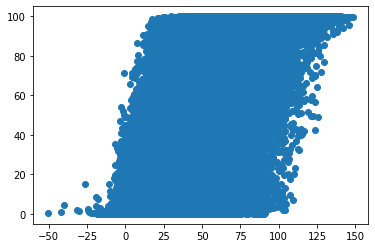

In [ ]:
# Make predictions using the testing set
Y_hat = regOls.predict(X_all)
# The coefficients
print('Coefficients: \n', regOls.coef_)
# The mean squared error
print('Mean squared error: %',mean_squared_error(Y_all,Y_hat))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ',r2_score(Y_all,Y_hat))

# plot Y vs Y-hat
plt.scatter(Y_hat,Y_all);

Now we can add in some non-linearities

In [9]:

# generate squared and interaction terms (elevation 2, distance to road x ag value)
poly = PolynomialFeatures(2)
X_all_poly2 = poly.fit_transform(X_all)
X_all_poly2.shape

(249940, 91)

In [10]:
# re-run OLS model using with the more complex functional form
# Fit and summarize OLS model
# Define model (automatically add a constant and normalize the data) 
regOlsPoly2 = LinearRegression(fit_intercept=True, normalize=True)
# Fit model
regOlsPoly2.fit(X_all_poly2, Y_all)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Mean squared error: % 549.8433782609096
Coefficient of determination:  0.5461500561455637


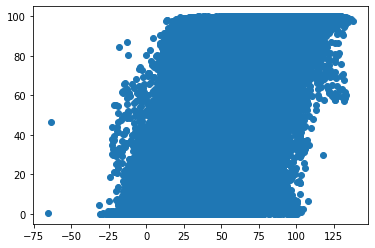

In [11]:
# Make predictions using the testing set
Y_hat_poly2 = regOlsPoly2.predict(X_all_poly2)
# The coefficients
# print('Coefficients: \n', regOlsPoly2.coef_)
# The mean squared error
print('Mean squared error: %',mean_squared_error(Y_all,Y_hat_poly2))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ',r2_score(Y_all,Y_hat_poly2))

# plot Y vs Y-hat
plt.scatter(Y_hat_poly2,Y_all);

Now that you have run a regular OLS regression on the full dataset, let's do the same thing but splitting the data into a training and a test set so we can compare it to models using machine learning 

In [12]:
# Define a function that can be used to always print the same output stats
def print_stats_output(mod,X_train,Y_train,X_test,Y_test):
  # Make predictions using the testing set
  Y_hat_train = mod.predict(X_train)
  Y_hat_test = mod.predict(X_test)

  # The mean squared error
  print('Mean squared error: %',mean_squared_error(Y_test,Y_hat_test))
  # The coefficient of determination: 1 is perfect prediction
  print('Coefficient of determination train: ',r2_score(Y_train,Y_hat_train))
  print('Coefficient of determination test: ',r2_score(Y_test,Y_hat_test))

  # plot Y vs Y-hat
  plt.scatter(Y_hat_test,Y_test);

In [13]:
# Repeat OLS using Train-Test splits

# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly split the data in 80% train and 20% test data
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

# # Split the data into training/testing sets
# deforestation_X_train = deforestation_X[:-20]
# deforestation_X_test = deforestation_X[-20:]

# # Split the targets into training/testing sets
# deforestation_y_train = deforestation_y[:-20]
# deforestation_y_test = deforestation_y[-20:]


In [14]:
Y_train

116278    53.077656
215555    82.052811
169750    51.337029
218612    18.919687
187577    93.009682
            ...    
240103     0.181406
181118     9.160313
225500    67.052345
118690    21.510468
48679     90.558121
Name: perc_treecover, Length: 199952, dtype: float64

In [15]:
# Artificially reduce the training data size, => this shows more clearly how the model is overfitting
N = 5000
X_train = X_train.iloc[:N,:]
Y_train = Y_train.iloc[:N]

Shape X_train_poly2 (5000, 91)
Mean squared error: % 1387.183881113377
Coefficient of determination train:  0.5615716765742484
Coefficient of determination test:  -0.14590115858855834


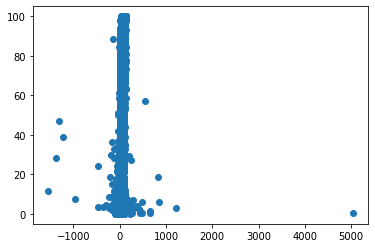

In [16]:
# generate squared and interaction terms (elevation 2, distance to road x ag value)
poly2 = PolynomialFeatures(2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)
print('Shape X_train_poly2',X_train_poly2.shape)

# Create linear regression object
regOlsSq = LinearRegression(normalize=True)

# Train the model using the training sets
regOlsSq.fit(X_train_poly2, Y_train)

print_stats_output(regOlsSq,X_train_poly2,Y_train,X_test_poly2,Y_test)

Shape X_train_poly3 (5000, 455)
Mean squared error: % 313206920.98480314
Coefficient of determination train:  0.6715281995619478
Coefficient of determination test:  -258121.68956782419


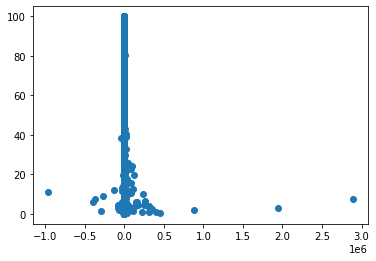

In [ ]:

# generate squared and interaction terms (elevation 2, distance to road x ag value)
poly = PolynomialFeatures(3)
X_train_poly3 = poly.fit_transform(X_train)
X_test_poly3 = poly.transform(X_test)
print('Shape X_train_poly3',X_train_poly3.shape)

# Create linear regression object
regOlsSq = LinearRegression(normalize=True)

# Train the model using the training sets
regOlsSq.fit(X_train_poly3, Y_train)

print_stats_output(regOlsSq,X_train_poly3,Y_train,X_test_poly3,Y_test)

Shape X_train_poly3 (5000, 1820)
Mean squared error: % 6.711735362209169e+17
Coefficient of determination train:  0.7914652440743445
Coefficient of determination test:  -553133110185953.06


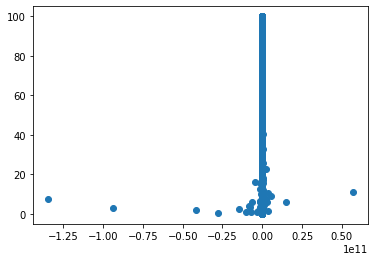

In [ ]:
# generate squared and interaction terms (elevation 2, distance to road x ag value)
poly = PolynomialFeatures(4)
X_train_poly3 = poly.fit_transform(X_train)
X_test_poly3 = poly.transform(X_test)
print('Shape X_train_poly3',X_train_poly3.shape)

# Create linear regression object
regOlsSq = LinearRegression(normalize=True)

# Train the model using the training sets
regOlsSq.fit(X_train_poly3, Y_train)

print_stats_output(regOlsSq,X_train_poly3,Y_train,X_test_poly3,Y_test)

In [ ]:
alphas = np.logspace(2, -8, num = 10, base = 2)
alphas

array([4.00000000e+00, 1.85174942e+00, 8.57243983e-01, 3.96850263e-01,
       1.83716812e-01, 8.50493750e-02, 3.93725328e-02, 1.82270162e-02,
       8.43796671e-03, 3.90625000e-03])

In [17]:
####  Can we run a LASSO on  the deforestation data and graph error vs lambda for the model? (slide 28 for day 1)
#  Based on https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

# #############################################################################
# LassoCV: coordinate descent
alphas = np.logspace(-16, -9, num = 1000, base = 2)

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=5,normalize=True,max_iter=100,alphas=alphas).fit(X_train_poly2, Y_train)
t_lasso_cv = time.time() - t1



Computing regularization path using the coordinate descent lasso...


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9468.183360281866, tolerance: 494.7674221544588
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9501.935901449528, tolerance: 494.7674221544588
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9536.250287692063, tolerance: 494.7674221544588
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_co

Best alpha 0.001906265739616078


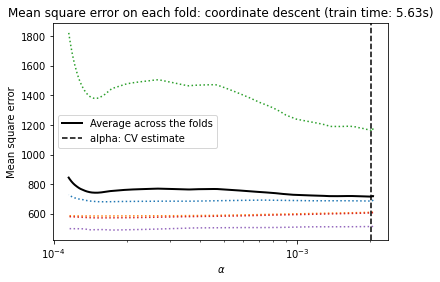

In [18]:
# Display results
plt.figure()
plt.semilogx(model.alphas_ + EPSILON, model.mse_path_, ':')
plt.plot(model.alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')

print('Best alpha', model.alpha_)

# plt.xlim(xmin, xmax)
# plt.ylim(650, 700)

In [ ]:

best_alpha = model.alpha_

In [ ]:

from sklearn import linear_model
regLasso = linear_model.Lasso(normalize=True,alpha=best_alpha)
regLasso.fit(X_train_poly2, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11761.693906111643, tolerance: 610.677921295967
  positive)


Lasso(alpha=0.0006485068390361431, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

Mean squared error: % 581.853096769217
Coefficient of determination train:  0.5519068099868546
Coefficient of determination test:  0.5204783923701195


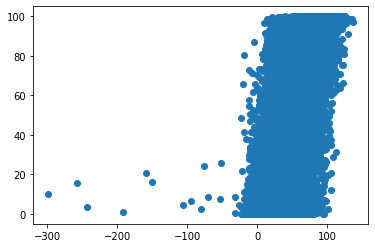

In [ ]:
print_stats_output(regLasso,X_train_poly2,Y_train,X_test_poly2,Y_test)


In [ ]:

coef = pd.DataFrame(regLasso.coef_,index = poly2.get_feature_names(),columns=['beta'])
# Show only selected coef
coef.loc[coef['beta']>0,:]

,beta
x0,2.220215e+01
x3,1.760592e-02
x6,4.623413e+01
x7,1.394301e-02
x8,4.769527e+00
x10,1.400912e+00
x11,5.250451e-02
x0 x3,1.092488e-03
x0 x5,3.319998e-03
x0 x8,1.297056e+01


# Day 1 Lab

Today's lab will have you run an OLS and LASSO regression using the deforestation data you saw in the introduction slides and in the lecture. If you haven't already, load the deforestation following the code above.

In [ ]:
# split the data into a train and test set as above

1.  Run an OLS model to predict percent forest cover (feel free to choose your own specification)

In [ ]:
# run OLS using a specification of your choice
# create an OLS object as above...

2. Generate predictions from your model and evaluate model fit

In [ ]:
# generate the predicted forest cover level and compare it to the actual forest cover in the test set 

In [ ]:
# plot predicted versus actual forest cover and produce measures of model fit

3.  Now run the same specification using a LASSO

In [ ]:
# generate a LASSO function from sklearn

In [ ]:
# use the same model as your OLS, and run

4. Generate the predicted deforestation from your model and compare to the actual deforestation in the test set

In [ ]:
###  Hugo and Thomas - I think we can let the students figure out this step from the above code for OLS

5. Now change your lambda and repeat.  
What happens as you increase your lambda? As you decrease your lambda? Are the results more or less similar to your OLS results?

In [ ]:
# change the lambda and repeat

6. Plot the bias and variance as the lambda decreases (and the model complexity increases)

7. Replicate the plot on the coefficient estimates against the shrinkage factor (on slide 24)

8. (Optional) So far we are just choosing our training and test set randomly.  Is this valid if there is high spatial correlation?  (if you like) try splitting your data based on latitude and re-run the OLS and the LASSO.  Do you expect your results to be better or worse than using the random split?

In [ ]:
# set a cut-point in the latitude variable to split data into a train and test set

In [ ]:
# re-run OLS and LASSO models using this new train and test set